**Link de dados: https://www.kaggle.com/naveengowda16/logistic-regression-heart-disease-prediction**

**Importando as libraries**

In [ ]:
import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

**Importa o dataset**

In [ ]:
arquivo = pd.read_csv("doencas_cardiacas.csv")

**Verificando os dados**

In [ ]:
arquivo.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
arquivo = arquivo.rename(columns={'male': 'Sexo', 'age': 'Idade',  'education': 'Educação','currentSmoker':'Fumante atual','cigsPerDay':'cigarros por dia','BPMeds': 'Pressão alta','prevalentStroke':'AVC prevalente','prevalentHyp':'Prevalência da hipertensão arterial','totChol':'pressão arterial','diaBP':'taxa diabetes','BMI':'IMC','heartRate':'frequência cardíaca','glucose':'glicose','TenYearCHD':'Fumou nos ultimos 10 anos','sysBP':'contração máxima do coração'})

In [ ]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sexo                                 4238 non-null   int64  
 1   Idade                                4238 non-null   int64  
 2   Educação                             4133 non-null   float64
 3   Fumante atual                        4238 non-null   int64  
 4   cigarros por dia                     4209 non-null   float64
 5   Pressão alta                         4185 non-null   float64
 6   AVC prevalente                       4238 non-null   int64  
 7   Prevalência da hipertensão arterial  4238 non-null   int64  
 8   diabetes                             4238 non-null   int64  
 9   pressão arterial                     4188 non-null   float64
 10  contração máxima do coração          4238 non-null   float64
 11  taxa diabetes                 

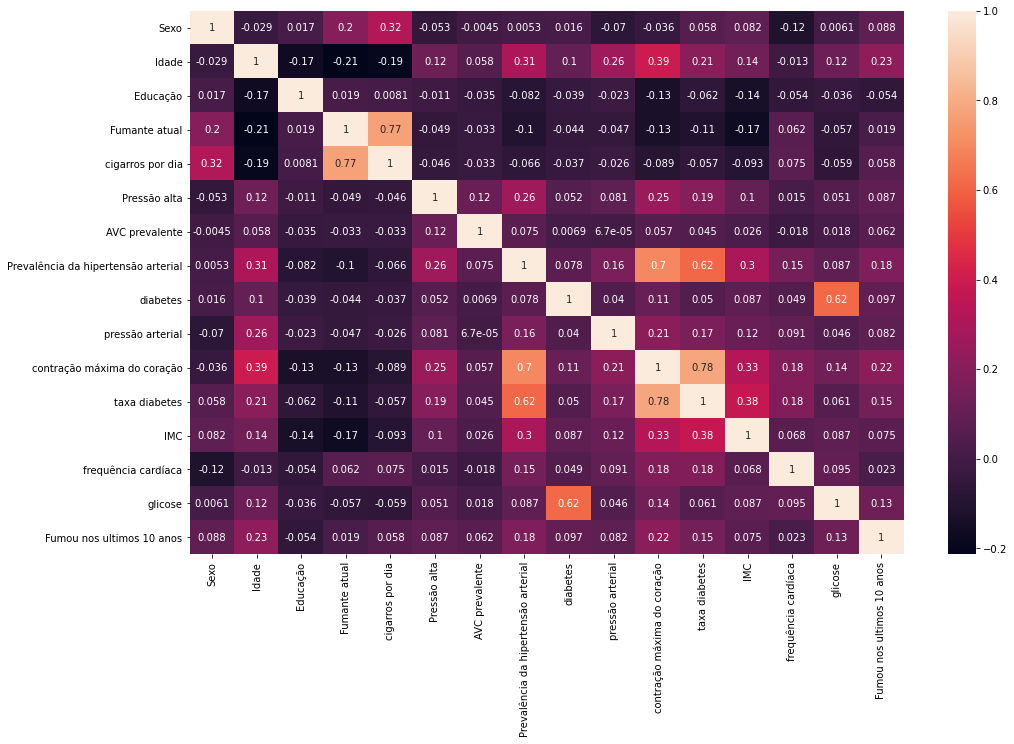

In [ ]:
plt.figure(figsize=(16,10))
plot = sn.heatmap( arquivo.corr(), annot = True)
plot

**Apagando os valores nulos**

In [ ]:
arquivo = arquivo.dropna()

**Selecionando o x e y**

In [ ]:
X = arquivo.iloc[:, :-1].values
y = arquivo.iloc[:, -1].values

**Separar dados em Treino e Teste**

In [ ]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 1/5, random_state = 0)

**Treinando o modelo**

In [ ]:
classificador = LogisticRegression()
classificador.fit(X_train, y_train)

/home/diego/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Previsao**

In [ ]:
y_pred = classificador.predict(X_test)
y_pred_prob = classificador.predict_proba(X_test)

In [ ]:
y_pred_prob = y_pred_prob[:,1]

**Matrix de confusao**

In [ ]:
matriz_confusao = confusion_matrix(y_test, y_pred)
print(matriz_confusao)

[[620   3]
 [103   6]]


In [ ]:
y_result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

**Acurácia**

In [ ]:
print(accuracy_score(y_test, y_pred))

0.855191256830601


**Testando**

In [ ]:
print(classificador.predict([[1,27,4,0,0,0,0,0,0,195,130,70,78,20,56]]))

[0]
